## K-means Implementation Steps:

- Step1: Randomly initialize centres.eg-3 -> u1,u2,u3
- Step2: Assign points to their nearest centres
- Step3: Update the centre location by taking mean of points assign to that centre
- Step4: Repeat step2 and step3 until convergence


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

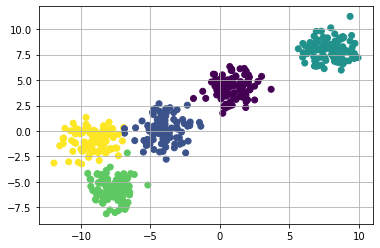

In [2]:
#Data Preparation
X,Y=make_blobs(n_samples=500,centers=5,random_state=3,n_features=2)
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=Y)

## K-Means : Implementing E step

In [13]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}

#Initialize one random centre for each cluster
for i in range(k):
    centre=(2*np.random.random((X.shape[1]))-1)*10
    points=[]
    cluster={
        'centre':centre,
        'points':points,
        'color' :color[i]
    }
    clusters[i]=cluster

In [14]:
print(clusters)

{0: {'centre': array([-9.08603435,  7.36506381]), 'points': [], 'color': 'green'}, 1: {'centre': array([-6.32805106,  7.49774969]), 'points': [], 'color': 'red'}, 2: {'centre': array([-3.60494868,  7.33093129]), 'points': [], 'color': 'blue'}, 3: {'centre': array([ 2.81587815, -0.92470695]), 'points': [], 'color': 'yellow'}, 4: {'centre': array([ 0.72434209, -3.08946665]), 'points': [], 'color': 'orange'}}


In [15]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
v1=np.array([1,2])
v2=np.array([3,5])
distance(v1,v2)

3.605551275463989

In [16]:
#Assign every point to one of the clusters
def assignPointToClusters(clusters):
    
    for ix in range(X.shape[0]):
        dist=[]
        cur_x=X[ix]
        
        for kx in range(k):
            d=distance(cur_x,clusters[kx]['centre'])
            dist.append(d)
            
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(cur_x)

## K-Means : Implementing M-step - Update every cluster centre according to mean

In [17]:
def updateClusters(clusters):
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        #if cluster have some non-zero points
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[kx]['centre']=new_u
            clusters[kx]['points']=[] #clear the list

In [18]:
def plotClusters(clusters):
    for kx in range(k):
        print(type(clusters[kx]['points']))
        print(len(clusters[kx]['points']))
        
        #plot the points and clusters
        pts=np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass #try and except are applied so that if any cluster has no point
        
        uk=clusters[kx]['centre']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

<class 'list'>
87
<class 'list'>
6
<class 'list'>
82
<class 'list'>
139
<class 'list'>
186


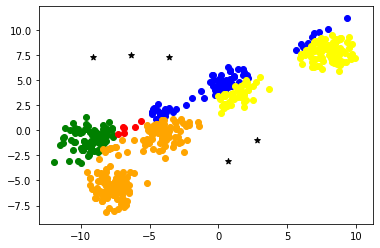

In [19]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

<class 'list'>
89
<class 'list'>
91
<class 'list'>
103
<class 'list'>
102
<class 'list'>
115


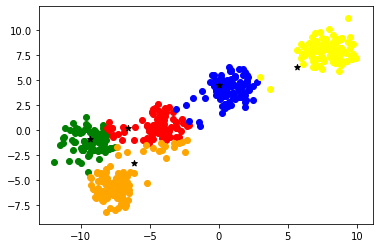

In [20]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

<class 'list'>
100
<class 'list'>
101
<class 'list'>
100
<class 'list'>
100
<class 'list'>
99


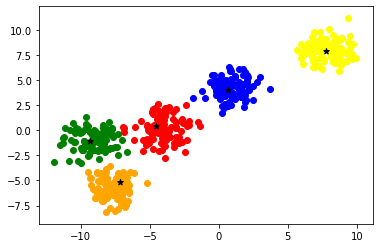

In [21]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

<class 'list'>
103
<class 'list'>
98
<class 'list'>
100
<class 'list'>
100
<class 'list'>
99


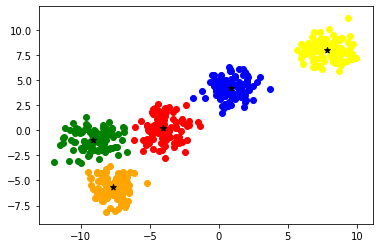

In [22]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)